# Lecture 10: Linear Regresion and the Bias-Variance Trade-Off
***

<img src="figs/targetsBannerTry.png",width=1100,height=50>

***

<br>
<br>

### Problem 1: Interpreting Regression Models 
***

*This problem was taken from **Introduction to Statistical Learning** by James et. al. *

Suppose we have a data set with five features, $x_1 = GPA$, $x_2 =  IQ$, $x_3 = Gender$ (0 for Male, 1 for Female), $x_4 = GPA \times IQ$, and $x_5 = GPA \times Gender$.  The response is starting salary after graduation (in thousands of dollars).  Suppose we use least squares to fit the model, and get the following estimates of the regression parameters; $\hat{w}_0 = 50$,  $\hat{w}_1 = 20$,  $\hat{w}_2 = 0.07$,  $\hat{w}_3 = 35$,  $\hat{w}_4 = 0.01$, and $\hat{w}_5 = -10$.  

<br>

**Q**: Predict the salary of a female with IQ of 110 and a GPA of 4.0. 

<br>

**Q**: Which of the following statements are correct, and why? 

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough. 

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough. 

<br>

[[Problem 1 Answers]](#prob1ans)

<br>

### Problem 2: Multiple Linear Regression on Advertising Data 
***

In this problem you will perform linear and multiple linear regression on a real-world data set describing the effect of advertisement spending on the sales of a product.  First we need to load the data. 

In [ ]:
import numpy as np 
D = np.genfromtxt('data/Advertising.csv', delimiter=',')
X, y = D[:,:3], D[:,3]

Each row in the data matrix $X$ contains advertising budgets for a particular market. The ﬁrst through third columns report advertising budgets for TV, Radio, and Newspaper, respectively, in units of thousands of dollars.  The entries of $y$ give the product sales for each market (in thousands of products sold). 


We’ll now use linear and multiple linear regression to attempt to determine what (if any) eﬀect advertising has on product sales. We’ll start by looking at the relationship between the sales numbers and each of the advertisement mediums separately. Then we’ll look at the relationship between sales and all of the advertisement mediums together.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regrTV = LinearRegression()
regrTV.fit(X[:,0].reshape(-1,1), y)
print "sales = ", regrTV.intercept_, " + ", regrTV.coef_[0], " x TV"

regrRadio = LinearRegression()
regrRadio.fit(X[:,1].reshape(-1,1), y)
print "sales = ", regrRadio.intercept_, " + ", regrRadio.coef_[0], " x Radio"

regrNews = LinearRegression()
regrNews.fit(X[:,2].reshape(-1,1), y)
print "sales = ", regrNews.intercept_, " + ", regrNews.coef_[0], " x Newspaper"

You can visualize the three linear regressions by running the code below. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
axes = [ax1, ax2, ax3]
regrs = [regrTV, regrRadio, regrNews]
features = ["TV", "Radio", "Newspaper"]

ax1.set_ylim(0,30)
ax1.set_ylabel("Sales")
for jj, (ax, regr, feat) in enumerate(zip(axes, regrs, features)):
    ax.grid(True)
    ax.set_xlim(0, np.max(X[:,jj]))
    ax.set_xlabel(feat, fontsize=20)
    ax.scatter(X[:,jj], y, s=25, color=mycolors["blue"], alpha=0.7)
    x = np.linspace(0, np.max(X[:,jj]))
    ax.plot(x, regr.intercept_ + regr.coef_[0]*x, lw=3, color=mycolors["blue"])

**Q**: Based on the individual linear regressions, what is the relationship between TV, Radio, Newspaper and Sales?  Based on the individual analyses, does it seem likely that advertising in each media market contributes to increased sales of the product?   

<br>

Now we'll fit a multiple linear regression model for the three features simultaneously. 

In [ ]:
regrAll = LinearRegression()
regrAll.fit(X, y)
print "sales = ", regrAll.intercept_, " + ", regrAll.coef_[0], " x TV + ", \
       regrAll.coef_[1], " x Radio + ", \
       regrAll.coef_[2], " x Newspaper"

**Q**: Based on the multiple linear regression model, what is the relationship between TV, Radio, and Newspaper advertising and Sales?  Based on the coefficients in your model, does it appear that all of the advertising mediums contribute significantly to an increase in products sold? 

**Q**:  It appears that something fishy might be going on here.  Let's look at the correlation between each of the features and sales. 

In [ ]:
print np.corrcoef(X.T, y)

Based on the correlation of the features, can you explain the disparity in model coefficients in the single linear regression and multiple linear regression settings? 

<br>

[[Problem 2 Answers]](#prob2ans)

<br>


<br>
<br>

### Problem 3: The Bias-Variance Trade-Off 
***

**Q**: The following graphic (from Scott Fortman-Roe's [*Understanding the Bias-Variance Trade-Off*](http://scott.fortmann-roe.com/docs/BiasVariance.html)) makes an analogy between target shooting and models of varying bias/variance.  Which target corresponds to each of the four possible combinations of high/low bias and high/low variance?  

<img style="float:center;width:500px;margin-right:300" src="figs/targetsSquareNo.jpg">


**Q**:  Consider the K-Nearest Neighbor models shown below corresponding to $K=1$ and $K=15$, respectively.  Discuss the effect of $K$ on the bias and variance of the KNN model.  


K = 1             |  K = 15
:-------------------------:|:-------------------------:
![](figs/hastieKNN1.png)  |  ![](figs/hastieKNN15.png)

**Q**: Consider the standard soft-margin SVM with objective function 

$$
\min_{{\bf w}, b} \|{\bf w}\|^2 + C \sum_{i=1}^m \xi_i 
$$

How does the choice of **kernel** function affect the bias/variance of the model?  

Similarly, for a **fixed** kernel type, how does the value of $C$ affect the bias/variance of the model? 

<br>

[[Problem 3 Answers]](#prob3ans)

<br>

***

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

<a id='prob1ans'></a>


### Problem 1: Interpreting Regression Models 
***

*This problem was taken from **Introduction to Statistical Learning** by James et. al. *

Suppose we have a data set with five features, $x_1 = GPA$, $x_2 =  IQ$, $x_3 = Gender$ (0 for Male, 1 for Female), $x_4 = GPA \times IQ$, and $x_5 = GPA \times Gender$.  The response is starting salary after graduation (in thousands of dollars).  Suppose we use least squares to fit the model, and get the following estimates of the regression parameters; $\hat{w}_0 = 50$,  $\hat{w}_1 = 20$,  $\hat{w}_2 = 0.07$,  $\hat{w}_3 = 35$,  $\hat{w}_4 = 0.01$, and $\hat{w}_5 = -10$.  

<br>

**Q**: Predict the salary of a female with IQ of 110 and a GPA of 4.0. 

<br>

**Q**: Which of the following statements are correct, and why? 

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough. 

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough. 


<br>

<a id='prob2ans'></a>

### Problem 2: Multiple Linear Regression on Advertising Data 
***

In this problem you will perform linear and multiple linear regression on a real-world data set describing the effect of advertisement spending on the sales of a product.  First we need to load the data. 

In [1]:
import numpy as np 
D = np.genfromtxt('data/Advertising.csv', delimiter=',')
X, y = D[:,:3], D[:,3]

Each row in the data matrix $X$ contains advertising budgets for a particular market. The ﬁrst through third columns report advertising budgets for TV, Radio, and Newspaper, respectively, in units of thousands of dollars.  The entries of $y$ give the product sales for each market (in thousands of products sold). 


We’ll now use linear and multiple linear regression to attempt to determine what (if any) eﬀect advertising has on product sales. We’ll start by looking at the relationship between the sales numbers and each of the advertisement mediums separately. Then we’ll look at the relationship between sales and all of the advertisement mediums together.

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
regrTV = LinearRegression()
regrTV.fit(X[:,0].reshape(-1,1), y)
print "sales = ", regrTV.intercept_, " + ", regrTV.coef_[0], " x TV"

regrRadio = LinearRegression()
regrRadio.fit(X[:,1].reshape(-1,1), y)
print "sales = ", regrRadio.intercept_, " + ", regrRadio.coef_[0], " x Radio"

regrNews = LinearRegression()
regrNews.fit(X[:,2].reshape(-1,1), y)
print "sales = ", regrNews.intercept_, " + ", regrNews.coef_[0], " x Newspaper"

sales =  7.03259354913  +  0.047536640433  x TV
sales =  9.31163809516  +  0.202495783392  x Radio
sales =  12.3514070693  +  0.0546930984723  x Newspaper


You can visualize the three linear regressions by running the code below. 

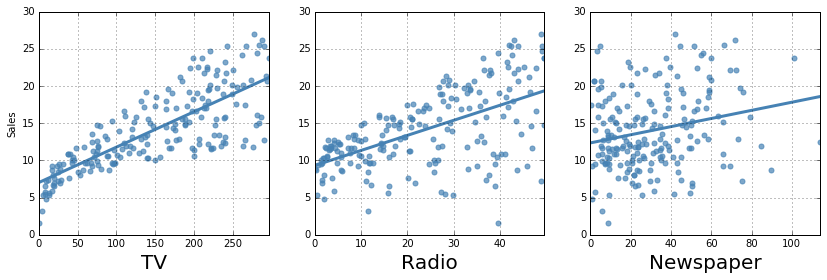

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
axes = [ax1, ax2, ax3]
regrs = [regrTV, regrRadio, regrNews]
features = ["TV", "Radio", "Newspaper"]

ax1.set_ylim(0,30)
ax1.set_ylabel("Sales")
for jj, (ax, regr, feat) in enumerate(zip(axes, regrs, features)):
    ax.grid(True)
    ax.set_xlim(0, np.max(X[:,jj]))
    ax.set_xlabel(feat, fontsize=20)
    ax.scatter(X[:,jj], y, s=25, color=mycolors["blue"], alpha=0.7)
    x = np.linspace(0, np.max(X[:,jj]))
    ax.plot(x, regr.intercept_ + regr.coef_[0]*x, lw=3, color=mycolors["blue"])

**Q**: Based on the individual linear regressions, what is the relationship between TV, Radio, Newspaper and Sales?  Based on the individual analyses, does it seem likely that advertising in each media market contributes to increased sales of the product?   

<br>

Now we'll fit a multiple linear regression model for the three features simultaneously. 

In [ ]:
regrAll = LinearRegression()
regrAll.fit(X, y)
print "sales = ", regrAll.intercept_, " + ", regrAll.coef_[0], " x TV + ", \
       regrAll.coef_[1], " x Radio + ", \
       regrAll.coef_[2], " x Newspaper"

**Q**: Based on the multiple linear regression model, what is the relationship between TV, Radio, and Newspaper advertising and Sales?  Based on the coefficients in your model, does it appear that all of the advertising mediums contribute significantly to an increase in products sold? 

**Q**:  It appears that something fishy might be going on here.  Let's look at the correlation between each of the features and sales. 

In [ ]:
print np.corrcoef(X.T, y)

Based on the correlation of the features, can you explain the disparity in model coefficients in the single linear regression and multiple linear regression settings? 

<a id='prob3ans'></a>


<br>
<br>

### Problem 3: The Bias-Variance Trade-Off 
***

**Q**: The following graphic (from Scott Fortman-Roe's [*Understanding the Bias-Variance Trade-Off*](http://scott.fortmann-roe.com/docs/BiasVariance.html)) makes an analogy between target shooting and models of varying bias/variance.  Which target corresponds to each of the four possible combinations of high/low bias and high/low variance?  

<img style="float:center;width:500px;margin-right:300" src="figs/targetsSquareNo.jpg">


**Q**:  Consider the K-Nearest Neighbor models shown below corresponding to $K=1$ and $K=15$, respectively.  Discuss the effect of $K$ on the bias and variance of the KNN model.  


K = 1             |  K = 15
:-------------------------:|:-------------------------:
![](figs/hastieKNN1.png)  |  ![](figs/hastieKNN15.png)

**Q**: Consider the standard soft-margin SVM with objective function 

$$
\min_{{\bf w}, b} \|{\bf w}\|^2 + C \sum_{i=1}^m \xi_i 
$$

How does the choice of **kernel** function affect the bias/variance of the model?  

Similarly, for a **fixed** kernel type, how does the value of $C$ affect the bias/variance of the model? 

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")